# Matplotlib basic usage patterns and best practice to get started

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Matplotlib graphs our data on Figures each of which can contain one or more Axes, an area where points can be specified in terms of x-y coordinates. THe siplest way of creating a Figure with an Axes is using pyplot.subplots. We can then use Axes.plot to draw some data on the Axes.

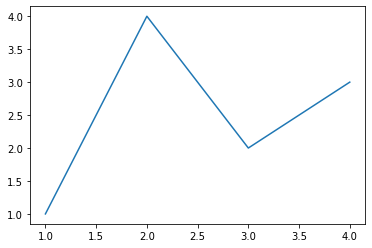

In [3]:
# create a figure containing a single axes.
fig, ax = plt.subplots()
# plot some data on the axes
ax.plot([1,2,3,4],[1,4,2,3]);

Figure: 
The whole figure. The Figure keeps track of all the child Axes, a group of 'special' Artist (titles, figure, legends, colorbars,etc) and even nested subfigures.

<Figure size 432x288 with 0 Axes>

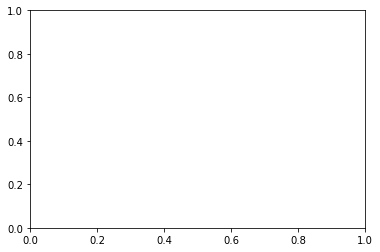

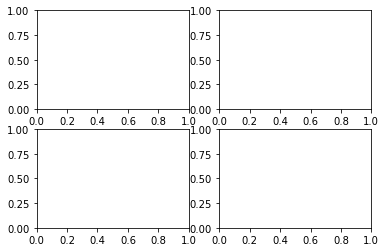

In [4]:
# figure with pyplot
# an empty figure with no axes
fig = plt.figure()
# a figure with a single axes
fig, ax = plt.subplots()
# a figure with a 2x2 grid if axes
fig, axs = plt.subplots(2, 2)

Axes: An axes is an Artis attached to a Figure that contains a region for plotting data, and usually includes two or three in the case of 3D Axis objects that provide ticks and tick lebels to provide scales for the data in the Axes. Each Axes also alo a title, an x-laebel, and a y-label. THe Axes class and its member function are the primary entry point to working with the OOP interface, and have most of the plotting methods defined on them.
Axis: These objects set scale and limits and generate ticks and ticklabels. The location of the ticks is determined by a Locator. The combinatin of the correct Locator and Formatter gives very fine control over the tick locations and labels.
Artist: Basically, every thing visible on the figure is an Artist. This includes Text objects, Line2D objects, collections ibjectsm Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.



# Type of inputs to plotting functions

Plotting functions expect numpy.array or numpy.ma.masked_array as input, or objects that can be passed to umpy/assarray. Classes that are similar to arraays such pandas data objects and numpy.matrix may not weork as intended. Common convention is to convert these to numpy.array objects prior to plotting.

In [7]:
# convert a numpy.matrix
b = np.matrix([[1, 2],[3,4]])
b_asarray = np.asarray(b)
print("This is matrix\n",b)
print("This is array\n",b_asarray)

This is matrix
 [[1 2]
 [3 4]]
This is array
 [[1 2]
 [3 4]]


Most method will also parse ab addressable object like a dict, a numpy.recarray, or a pandas.Dataframe. Matplotlib allows us provide the data keyword argument and generate plots passing the strings corresponding to the x and y variable.

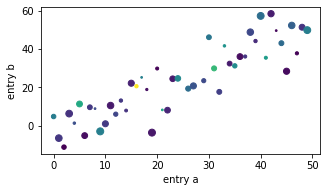

In [13]:
np.random.seed(19680801)  # seed the random number generator
data = {'a' : np.arange(50),
        'c' : np.random.randint(0, 50, 50),
        'd' : np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize = (5, 2.7)) # , layout='constrained'
ax.scatter('a', 'b', 'c', 'd',data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b');

# Coding style
### The object-oriented and the pyplot interfaces
##### There are essentially two ways to use Matplotlib:
###### * Explicity create Figures and Axes, and call methods on them (the object-oriented (OO) style)
###### * Rely on pyplot to automatically create and manage the Figures and Axes, and use pyplot function for plotting

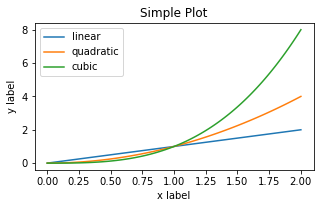

In [18]:
# OO- style
x = np.linspace(0, 2, 100) # sample data
# even in the OO-style we use '.pyplot.figure' to crate the Figure
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(x, x, label='linear') # plot some data on the axes
ax.plot(x, x**2, label='quadratic')
ax.plot(x, x**3, label='cubic')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("Simple Plot")
ax.legend();

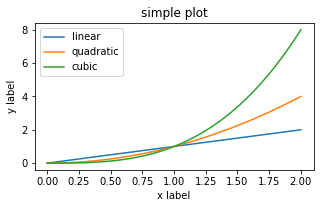

In [21]:
# pyplot style
x = np.linspace(0, 2, 100)
plt.figure(figsize=(5, 2.7))
plt.plot(x , x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel("x label")
plt.ylabel("y label")
plt.title("simple plot")
plt.legend();

# Making a helper function
If we need to make the same plots over and over again with differant data sets, or want to easily wrap Matplotlib methods, use the signature function below

In [22]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

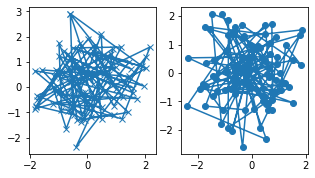

In [25]:
# two subplot
data1, data2, data3, data4 = np.random.randn(4, 100) # make a 4 random dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

# Styling Artists
Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a setter on the Artist. In the plot below we manually set the color, linewidth, and linestyle of the Artists created by the plot, abd we set the linestyle of the second line after the fact with set_linestyle.

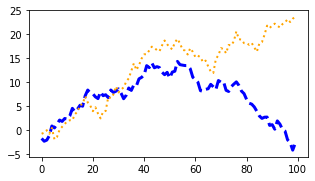

In [26]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');

# Colors
Matplotlib has a very flexible array of colors that are accepted for most Artists.

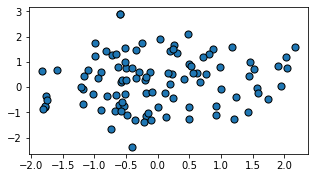

In [32]:
fig, ax = plt.subplots(figsize=(5,2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k');

# Linewidths, linestye, markersizes
Line widths are typically intypographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle.
#
Marker size depends on the method being used. plot specifies markersize in points, and is generally the "diameter" or width of the marker. scatter specifies markersize as approximately propotional ti the visual area of the marker. There is an array of markerstyle available as string codes, or user can define their own MarkerStyle  

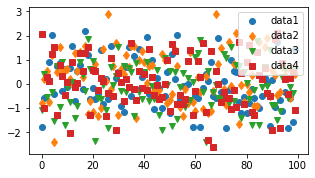

In [33]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

# Lebeling Plots